In [1]:
#importing modules
import pandas as pd
from preprocessing import Preprocessing
from model import Modelling
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


/home/ghost/anaconda3/lib/python3.9/zoneinfo/_tzpath.py:44: InvalidTZPathWarning: Invalid paths specified in PYTHONTZPATH environment variable. Paths should be absolute but found the following relative paths:
     /run/media/ghost/STORAGE1/System-Application/anaconda3/share/zoneinfo
     /run/media/ghost/STORAGE1/System-Application/anaconda3/share/tzinfo
  warnings.warn(


In [2]:
#defininig variables
categorical_cols = ['round', 'day', 'venue', 'result', 'opponent', 'captain', 'formation', 'referee', 'pk', 'pkatt', 'season', 'team']
numerical_cols = ['xg', 'xga', 'poss', 'attendance', 'sh', 'sot', 'dist']
features = ['round', 'day', 'venue', 'opponent', 'captain', 'formation', 'referee', 'pk', 'pkatt', 'season', 'team', 'xg', 'xga', 'poss', 'attendance', 'sh', 'sot', 'dist']
target = 'result'

<---------------Missing values before temporal imputation---------------->
<---------------Missing values after temporal imputation---------------->
<---------------Missing values after dropping rows with missing values---------------->


<Figure size 1200x800 with 0 Axes>

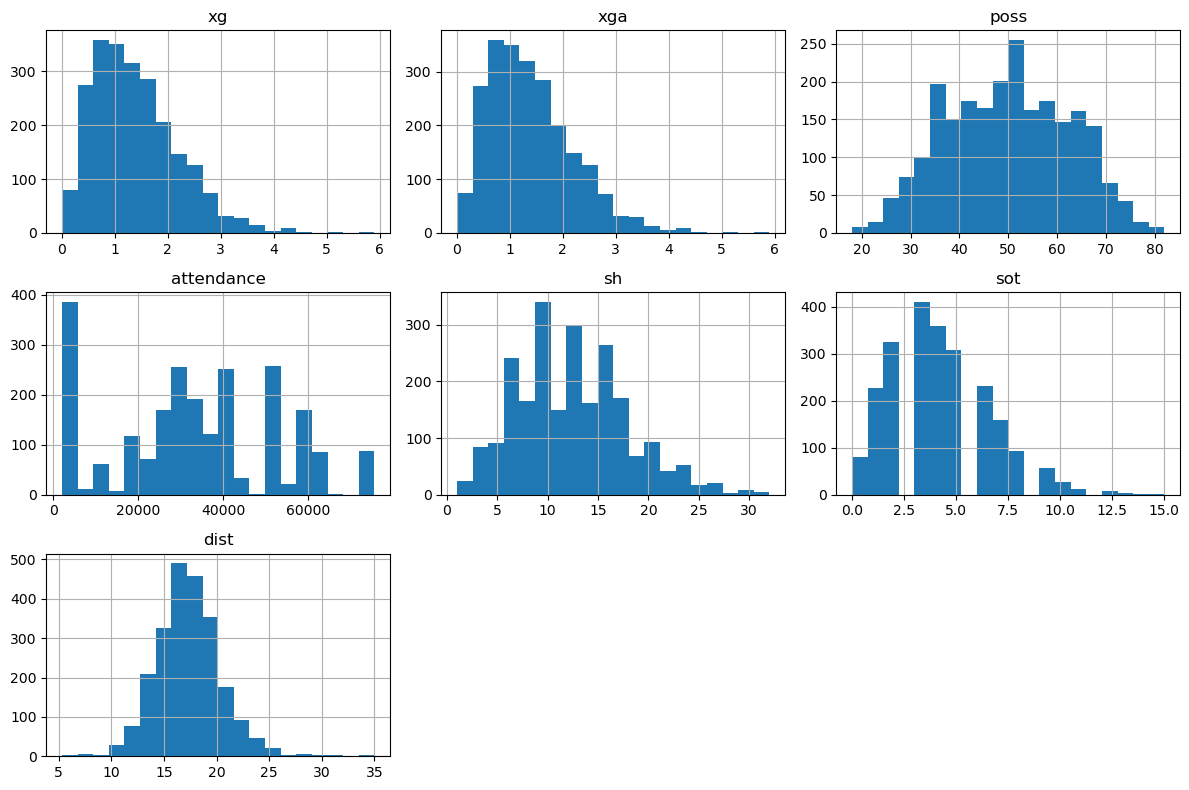

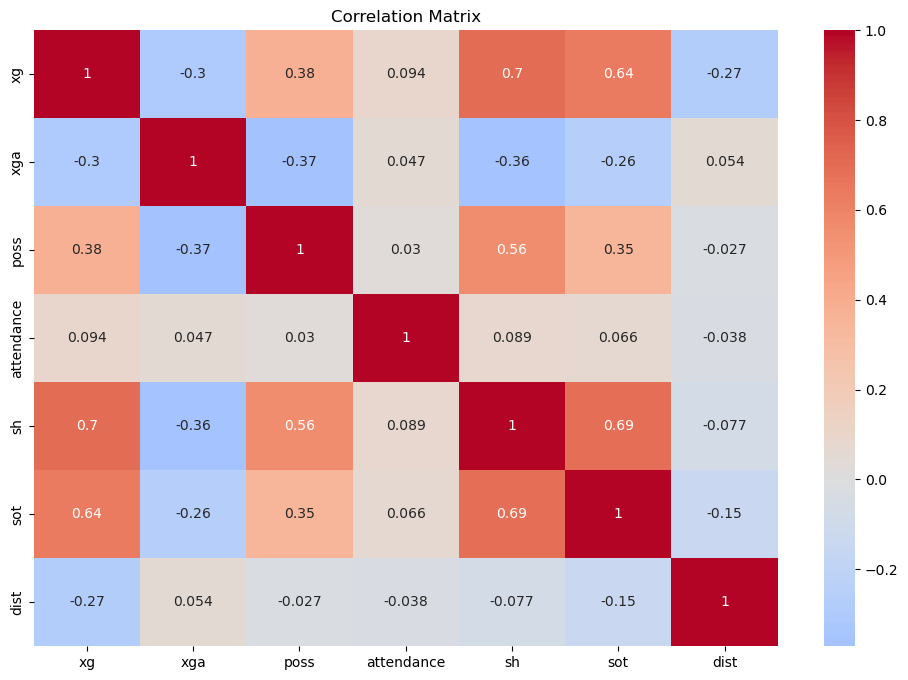

1837 1837 467 467


In [4]:
#reading and laading the data
dataset = pd.read_csv("matchees2.csv", index_col=0)

#initializing module imports
preprocessing = Preprocessing(dataset)

preprocessing.fix_dataset_index()
preprocessing.convert_date_to_datetime("date")
preprocessing.remove_data_values("2020-01-01")

print("<---------------Missing values before temporal imputation---------------->")
# preprocessing.check_missing_values()

preprocessing.drop_columns(["comp", "notes", "match report"])
dataset = preprocessing.perform_temporal_imputation("attendance")
dataset = preprocessing.perform_temporal_imputation_away("attendance")

print("<---------------Missing values after temporal imputation---------------->")
# preprocessing.check_missing_values() 

preprocessing.drop_rows_with_missing_values()
print("<---------------Missing values after dropping rows with missing values---------------->")
# preprocessing.check_missing_values() 

preprocessing.perform_label_column_encoding(categorical_cols)

preprocessing.plot_distributions(numerical_cols) #plotting the distributions of the numerical columns to ascertain if gaussian or not

preprocessing.plot_correlation_matrix(numerical_cols) #plotting the correlation matrix to ascertain if there is a correlation between the numerical columns

preprocessing.perform_normalization(["dist", "poss"], type_="standard") #performing standard normalization on the numerical columns that follow a gaussian distribution

preprocessing.perform_normalization([item for item in numerical_cols if item not in ["dist", "poss"]], type_="minmax") #performing minmax normalization on the numerical columns that do not follow a gaussian distribution

X_train, y_train, X_test, y_test = preprocessing.split_dataset(features)
print(len(X_train), len(y_train), len(X_test), len(y_test))

In [5]:
modelling = Modelling(X_train, y_train)

In [7]:
#rfc
# best_params_rfc = modelling.perform_hyperparameter_tuning(type_="rfc")
trained_model = modelling.model_data_with_best_param(best_params_rfc,type_="rfc")
y_pred = modelling.make_predictions(trained_model, X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set using best hyperparameters: {accuracy}")

#mlp
# best_params_mlp = modelling.perform_hyperparameter_tuning(type_="mlp")
trained_model = modelling.model_data_with_best_param(best_params_mlp,type_="mlp")
y_pred = modelling.make_predictions(trained_model, X_test)
accuracy = accuracy_score(y_test, y_pred)

#xgb
# best_params_xgb = modelling.perform_hyperparameter_tuning(type_="xgb")
# trained_model = modelling.model_data_with_best_param(best_params_xgb,type_="xgb")
# y_pred = modelling.make_predictions(trained_model, X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy on test set using best hyperparameters: {accuracy}")
# print("best params",best_params_rfc)
# print("best params", best_params_mlp)
# print("best_params", best_params_xgb)

best_params_rfc = {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
best_params_mlp = {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 2000, 'solver': 'adam'}
best_params_gotten_xgb = {'colsample_bytree': 0.9, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}

Accuracy on test set using best hyperparameters: 0.5910064239828694


TypeError: __init__() got an unexpected keyword argument 'max_depth'

In [10]:
trained_model = modelling.model_data_with_best_param(best_params_mlp,type_="mlp")
y_pred = modelling.make_predictions(trained_model, X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set using best hyperparameters mlp: {accuracy}")


Accuracy on test set using best hyperparameters mlp: 0.5781584582441114


In [11]:
#introducing new features (team streaks)
preprocessing.create_streak_features() #create streak features for last five matches for each team
print(preprocessing.dataset["win_streak"].unique())
preprocessing.dataset.tail(30)

#rechoose features

features+=["win_streak"]

X_train, y_train, X_test, y_test = preprocessing.split_dataset(features)
# print(len(X_train), len(y_train), len(X_test), len(y_test))
X_test.head(5)

[0 1 2 3 4 5]


,round,day,venue,opponent,captain,formation,referee,pk,pkatt,season,team,xg,xga,poss,attendance,sh,sot,dist,win_streak
52,8,1,1,23,83,15,16,0,0,3,0,0.355932,0.169492,1.281508,0.790322,0.483871,0.333333,0.283462,0
280,8,1,0,3,38,4,7,0,0,3,20,0.186441,0.338983,0.883573,0.205817,0.451613,0.533333,0.774808,2
393,8,1,1,9,55,15,1,0,0,3,7,0.067797,0.423729,-1.106099,0.315123,0.096774,0.000000,-1.419870,0
470,8,1,0,8,109,15,4,0,0,3,24,0.135593,0.288136,-0.628577,0.506513,0.193548,0.266667,0.414488,2
622,8,1,1,24,63,15,4,0,0,3,8,0.288136,0.135593,0.644813,0.506513,0.354839,0.333333,0.611026,1


In [16]:
best_params_mlp["learning_rate"] = 0.2
print(best_params_mlp)

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 25), 'learning_rate': 0.2, 'learning_rate_init': 0.001, 'max_iter': 2000, 'solver': 'adam'}


[14:19:28] WARNING: ../src/learner.cc:767: 
Parameters: { "activation", "hidden_layer_sizes", "learning_rate_init", "max_iter", "solver" } are not used.

[14:19:29] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.



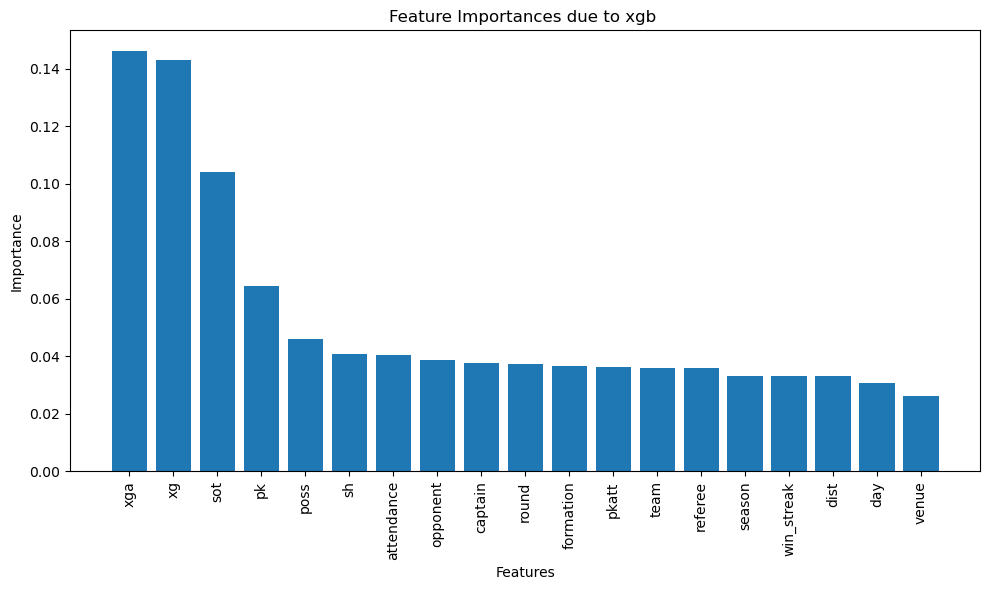

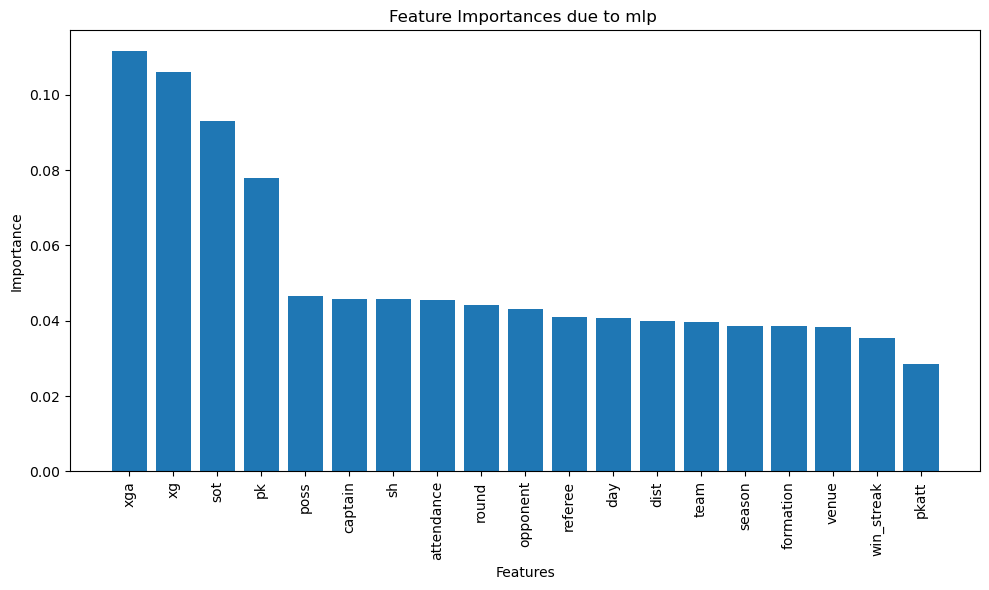

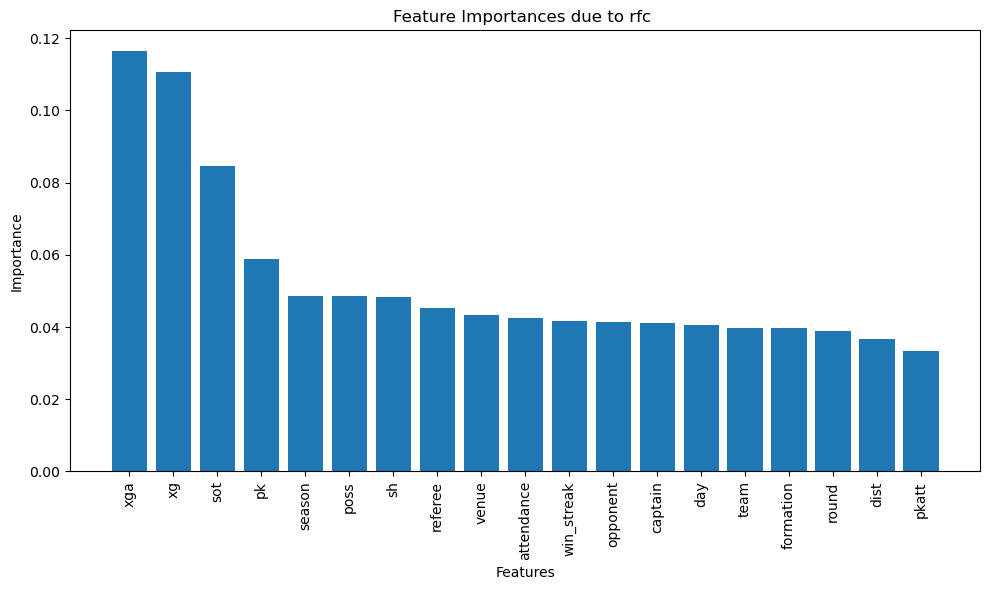

In [18]:
modelling = Modelling(X_train, y_train)
best_params_gotten_xgb = {'colsample_bytree': 0.9, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
# Train an XGBoost model with your data
trained_model_xgb = modelling.model_data_with_best_param(best_params_gotten_xgb, type_="xgb")
trained_model_mlp = modelling.model_data_with_best_param(best_params_mlp, type_="xgb")
trained_model_rfc = modelling.model_data_with_best_param(best_params_rfc, type_="xgb")


# Get feature importances
feature_importances = trained_model_xgb.feature_importances_

# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_features = [X_train.columns[i] for i in sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_features)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances due to xgb ')
plt.tight_layout()
plt.show()

#--------------------------------------------
# Get feature importances
feature_importances = trained_model_mlp.feature_importances_

# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_features = [X_train.columns[i] for i in sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_features)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances due to mlp ')
plt.tight_layout()
plt.show()
#-------------------------------------------------
# Get feature importances
feature_importances = trained_model_rfc.feature_importances_

# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_features = [X_train.columns[i] for i in sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_features)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances due to rfc ')
plt.tight_layout()
plt.show()